In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
data = pd.read_csv('daily_test_case_dataset.csv')
df = pd.DataFrame(data)

In [3]:
# head
df.head()

,Date,API Test Cases Count,API Pass %,API Rerun Pass %,UI Test Cases Count,UI Pass %,UI Rerun 1 Pass %,UI Rerun 2 Pass %,AWS Cost ($)
0,01/01/2025,428,100,NaN,1254,91.04,95.92,99.53,321919.16
1,02/01/2025,428,100,NaN,1254,91.08,95.17,99.90,321779.46
2,03/01/2025,428,100,NaN,1254,90.55,94.59,97.50,319093.74
3,04/01/2025,428,100,NaN,1254,90.85,94.79,97.88,319708.66
4,05/01/2025,428,100,NaN,1254,90.40,95.42,99.37,321109.09


In [4]:
# Describe
df.describe()

,API Test Cases Count,API Pass %,API Rerun Pass %,UI Test Cases Count,UI Pass %,UI Rerun 1 Pass %,UI Rerun 2 Pass %,AWS Cost ($)
count,283.000000,283.000000,54.0,283.000000,283.000000,283.000000,283.00000,2.830000e+02
mean,950.515901,99.431095,100.0,2777.265018,91.007880,95.028339,98.55212,7.067138e+05
std,302.190330,1.338739,0.0,894.492124,0.550747,0.588285,0.84354,2.268537e+05
min,428.000000,95.000000,100.0,1254.000000,90.000000,94.000000,97.02000,3.102855e+05
25%,715.000000,100.000000,100.0,1989.000000,90.615000,94.535000,97.76500,5.007223e+05
50%,968.000000,100.000000,100.0,2832.000000,91.000000,95.070000,98.55000,7.218212e+05
75%,1213.000000,100.000000,100.0,3573.000000,91.475000,95.480000,99.27000,9.010412e+05
max,1505.000000,100.000000,100.0,4251.000000,91.990000,95.990000,100.00000,1.100391e+06


Checking for null entries and treating them

In [9]:
numeric_cols = [col for col in df.columns if col != 'Date']

In [ ]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(0)

print("DataFrame head after processing:")
print(df.head())
print("\nDataFrame info after processing:")
df.info()

DataFrame head after processing:
         Date  API Test Cases Count  API Pass %  API Rerun Pass %  \
0  01/01/2025                   428         100               0.0   
1  02/01/2025                   428         100               0.0   
2  03/01/2025                   428         100               0.0   
3  04/01/2025                   428         100               0.0   
4  05/01/2025                   428         100               0.0   

   UI Test Cases Count  UI Pass %  UI Rerun 1 Pass %  UI Rerun 2 Pass %  \
0                 1254      91.04              95.92              99.53   
1                 1254      91.08              95.17              99.90   
2                 1254      90.55              94.59              97.50   
3                 1254      90.85              94.79              97.88   
4                 1254      90.40              95.42              99.37   

   AWS Cost ($)  
0     321919.16  
1     321779.46  
2     319093.74  
3     319708.66  
4     32110

Univariate analysis

In [11]:
dependent_var = 'AWS Cost ($)'
independent_vars = [col for col in df.columns if col not in ['Date', dependent_var]]

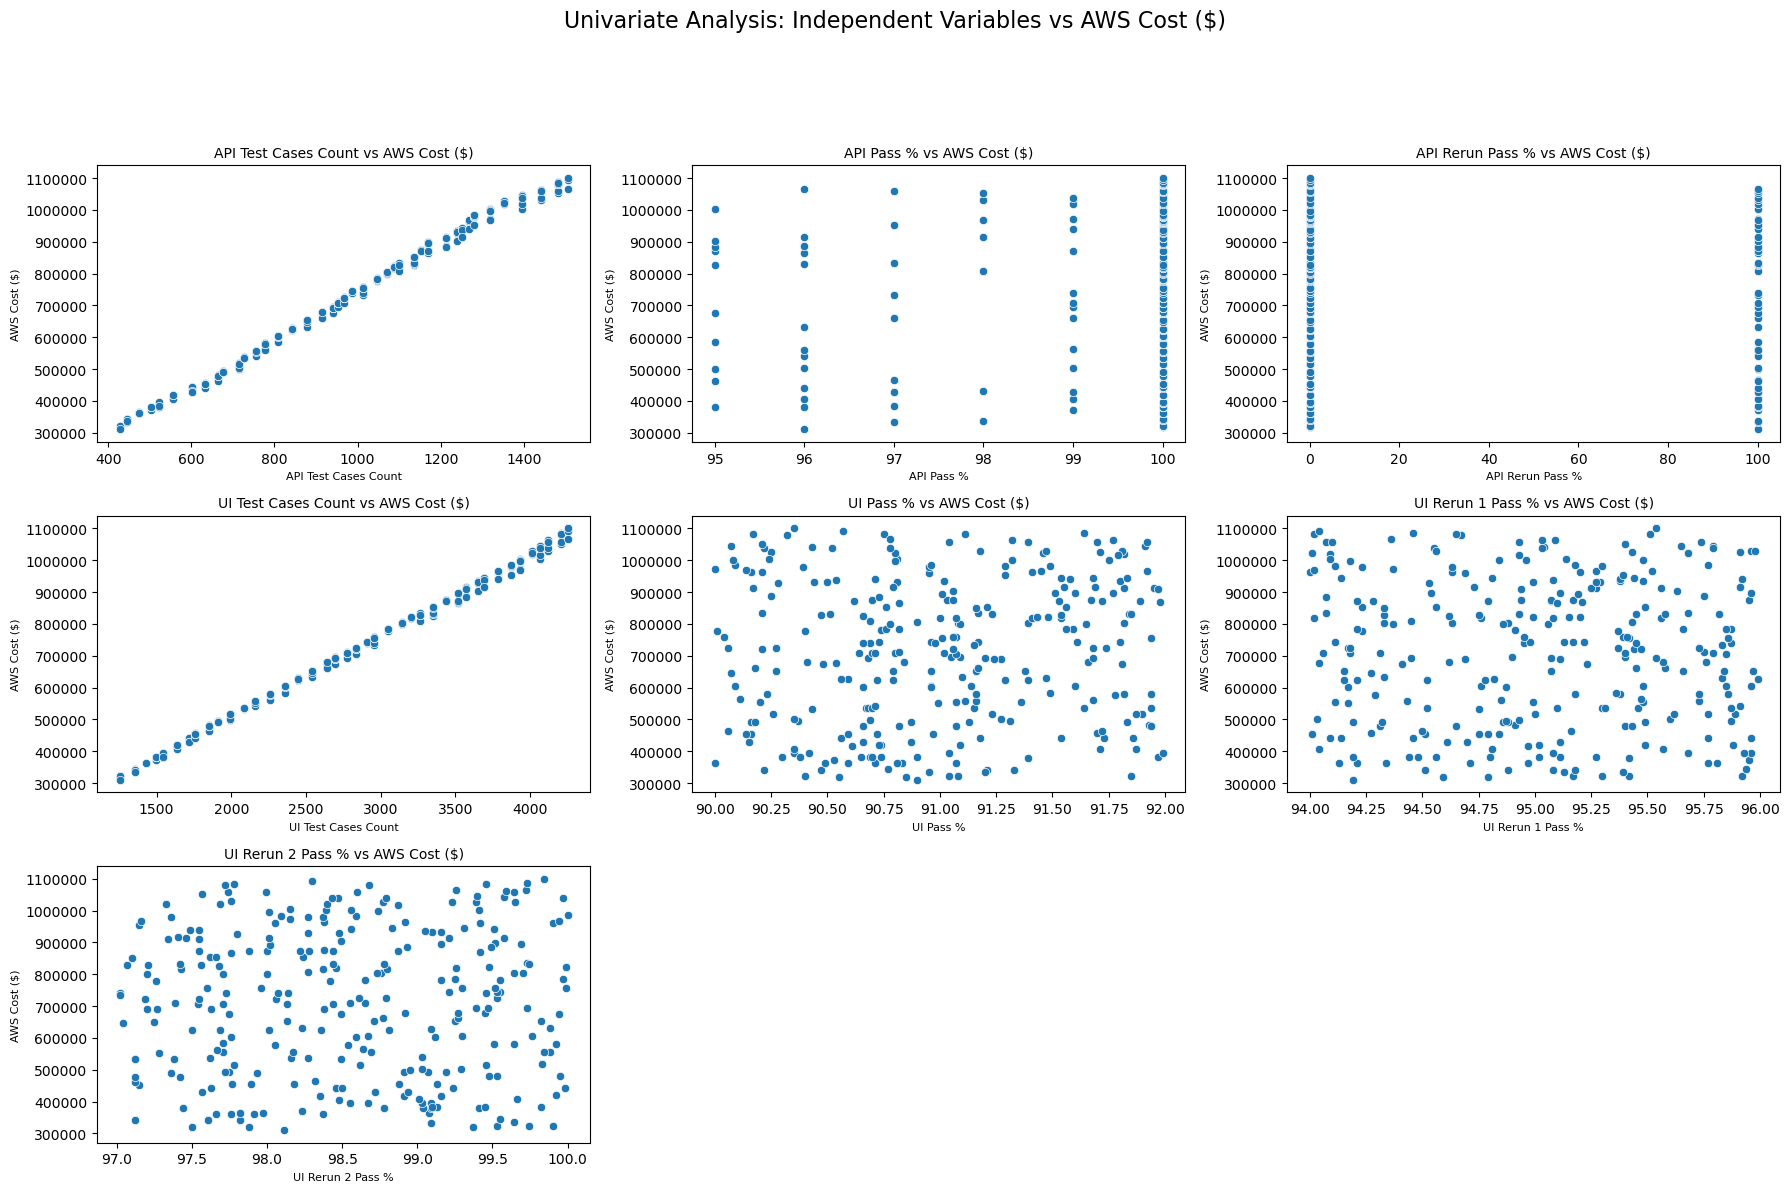

In [14]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(independent_vars):
    plt.subplot(3, 3, i + 1) # Adjust subplot layout based on number of features
    sns.scatterplot(x=df[col], y=df[dependent_var])
    plt.title(f'{col} vs {dependent_var}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel(dependent_var, fontsize=8)
    plt.ticklabel_format(style='plain', axis='y') # Use plain format for cost axis
    plt.tight_layout()

plt.suptitle('Univariate Analysis: Independent Variables vs AWS Cost ($)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('univariate_analysis_scatter_plots.png')
plt.show() # In a Jupyter environment, this will display the plot

Analysis:

With increase in UI / API Cases the cost of AWS tends to increase, whereas its tough to tell with respect to that of pass percentage numbers.

Check for Outliers and Treat them using Scalers

In [15]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
X = df.drop(['Date', dependent_var], axis=1) # Drop 'Date'
y = df[dependent_var]

In [21]:
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_robust_scaled_df['AWS Cost ($)'] = y.values
X_robust_scaled_df.to_csv('robust_scaled_data.csv', index=False)


In [22]:
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pd.DataFrame(X_minmax_scaled, columns=X.columns).to_csv('minmax_scaled_features.csv', index=False)


In [23]:

standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
pd.DataFrame(X_standard_scaled, columns=X.columns).to_csv('standard_scaled_features.csv', index=False)

Model traning

In [24]:
# Using robust scalar data
df_scaled = pd.read_csv('robust_scaled_data.csv')

In [25]:
dependent_var = 'AWS Cost ($)'
X = df_scaled.drop([dependent_var], axis=1)
y = df_scaled[dependent_var]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data split complete:
X_train shape: (226, 7)
X_test shape: (57, 7)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)


In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R-squared (R^2) Score: {r2:.4f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): $2005.61
R-squared (R^2) Score: 0.9998


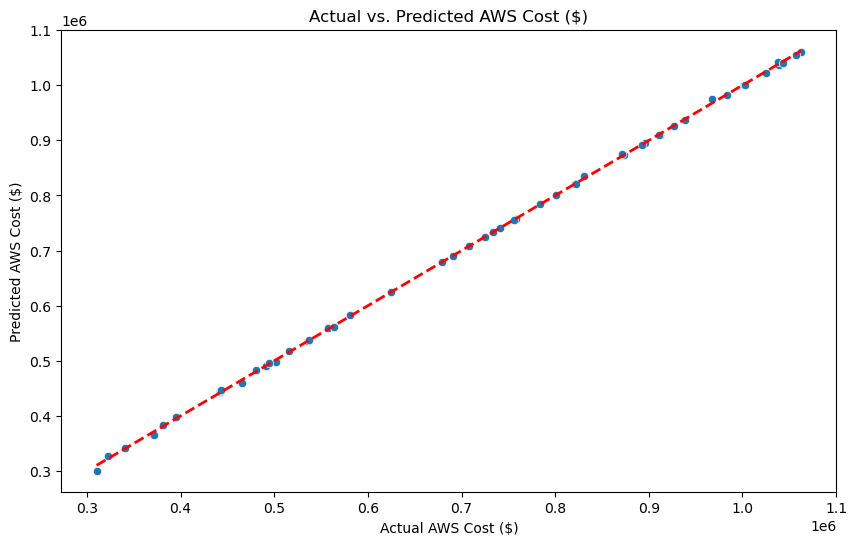

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted AWS Cost ($)')
plt.xlabel('Actual AWS Cost ($)')
plt.ylabel('Predicted AWS Cost ($)')
plt.savefig('actual_vs_predicted_cost.png')